# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib3 import request

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw['Latitude Group'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Below -10.5', 'Above or Equal -10.5'])

aggregated_results = sinasc_raw.groupby('Latitude Group').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
aggregated_results

/tmp/ipykernel_9048/3357233672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_results = sinasc_raw.groupby('Latitude Group').agg({


PESO                                              \
                           sum         mean  min   max  median         std   
Latitude Group                                                               
Below -10.5           42098594  3240.098053  258  5985  3270.0  531.815114   
Above or Equal -10.5  45555148  3246.055864  295  5190  3275.0  556.487709   

                                     IDADEPAI                                \
                                var       sum       mean   min   max median   
Latitude Group                                                                
Below -10.5           282827.315354  198460.0  30.903145  15.0  86.0   30.0   
Above or Equal -10.5  309678.570242   38038.0  32.126689  16.0  73.0   31.0   

                                           
                           std        var  
Latitude Group                             
Below -10.5           7.707002  59.397875  
Above or Equal -10.5  8.034214  64.548602

In [6]:
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] >= -10.5, '>= -10.5', '< -10.5')

aggregated_results = sinasc_raw.groupby('faixa_latitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

aggregated_results

PESO                                              \
                     sum         mean  min   max  median         std   
faixa_latitude                                                         
< -10.5         42101809  3240.096121  258  5985  3270.0  531.794694   
>= -10.5        45555148  3246.055864  295  5190  3275.0  556.487709   

                                 APGAR1                                        \
                          var       sum      mean  min   max median       std   
faixa_latitude                                                                  
< -10.5         282805.596163  104599.0  8.070288  0.0  10.0    8.0  0.960765   
>= -10.5        309678.570242  114559.0  8.199771  0.0  10.0    8.0  1.002839   

                          
                     var  
faixa_latitude            
< -10.5         0.923069  
>= -10.5        1.005686

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
tab2 = pd.cut(sinasc_raw['munResArea'],[sinasc_raw['munResArea'].min()-1,3000,sinasc_raw['munResArea'].max()+1])

In [8]:
sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),
                                                            ('Média','mean'),
                                                            ('Mínimo','min'),
                                                            ('Máximo','max'),
                                                            ('Mediana','median'),
                                                            ('Desvio Padrão','std'),
                                                            ('Variância','var')])


/tmp/ipykernel_9048/114362923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(tab2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),


QTDFILVIVO                                                \
                          Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                                     
(458.978, 3000.0]       4773.0  0.924284    0.0   30.0     1.0      1.075442   
(3000.0, 34097.394]    22053.0  1.086890    0.0   14.0     1.0      1.191750   

                              QTDFILMORT                                  \
                    Variância       Soma     Média Mínimo Máximo Mediana   
munResArea                                                                 
(458.978, 3000.0]    1.156575     1260.0  0.244803    0.0    4.0     0.0   
(3000.0, 34097.394]  1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                             
                    Desvio Padrão Variância  
munResArea                                   
(458.978, 3000.0]        0.551215  0.303838  
(3000.0, 34097.394]      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
idade_mae = pd.cut(sinasc_raw['munResAlt'], 5)
sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
                       index=['ESCMAE', idade_mae],
                       aggfunc={
                           'PESO': ['mean', 'median'],
                           'IDADEPAI': [('maximo',np.max), ('minimo', np.min)]
                       },
                       dropna=True)


/tmp/ipykernel_9048/1554764931.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
/tmp/ipykernel_9048/1554764931.py:2: FutureWarning: The provided callable <function max at 0x700b74193d80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],
/tmp/ipykernel_9048/1554764931.py:2: FutureWarning: The provided callable <function min at 0x700b74193ec0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_raw.pivot_table(values=['PESO', 'IDADEPAI'],


IDADEPAI                PESO        
                                 maximo minimo         mean  median
ESCMAE          munResAlt                                          
1 a 3 anos      (84.49, 187.0]     60.0   18.0  3164.506944  3227.5
                (187.0, 289.0]     55.0   21.0  3167.235294  3290.0
                (289.0, 391.0]     41.0   17.0  3286.166667  3295.0
                (391.0, 493.0]     38.0   23.0  3102.000000  3170.0
                (493.0, 595.0]      NaN    NaN  2846.900000  3050.0
12 anos ou mais (84.49, 187.0]     65.0   17.0  3260.066379  3285.0
                (187.0, 289.0]     60.0   18.0  3208.946331  3230.0
                (289.0, 391.0]     58.0   19.0  3237.820513  3292.0
                (391.0, 493.0]     44.0   21.0  3278.344086  3300.0
                (493.0, 595.0]     60.0   18.0  3207.607219  3270.0
4 a 7 anos      (84.49, 187.0]     73.0   16.0  3238.246524  3275.0
                (187.0, 289.0]     86.0   16.0  3173.756131  3232.5
                (289.0, 391.0]     47.0   18.0  3286.981308  3384.0
                (391.0, 493.0]     47.0   18.0  3212.245614  3195.0
                (493.0, 595.0]     23.0   23.0  3137.688525  3240.0
8 a 11 anos     (84.49, 187.0]     70.0   15.0  3256.105529  3275.0
                (187.0, 289.0]     69.0   16.0  3225.353300  3255.0
                (289.0, 391.0]     61.0   17.0  3244.339564  3260.0
                (391.0, 493.0]     53.0   16.0  3244.593301  3310.0
                (493.0, 595.0]     47.0   24.0  3256.625384  3280.0
Nenhuma         (84.49, 187.0]     52.0   29.0  3209.166667  3135.0
                (187.0, 289.0]     43.0   30.0  2577.428571  2905.0
                (289.0, 391.0]      NaN    NaN  2255.000000  2255.0
                (493.0, 595.0]      NaN    NaN  3425.000000  3425.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [10]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}
imediatas

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Ariquemes': 'Ariquemes',
 'Alto Paraíso': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Jaru': 'Jaru',
 'Governador Jorge Teixeira': 'Jaru',
 "Machadinho D'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 'Cacoal': 'Cacoal',
 "Alta Floresta D'Oe

In [12]:
# Adicionando a coluna da região imediata
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [13]:
# Convertendo a data de nascimento para formato de data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [14]:
# Criando coluna do mês e ano para análise temporal
sinasc_raw['ano_mes'] = sinasc_raw['DTNASC'].dt.to_period('M')

In [15]:
# Calculando a idade média por região imediata e mês
idade_media = sinasc_raw.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()

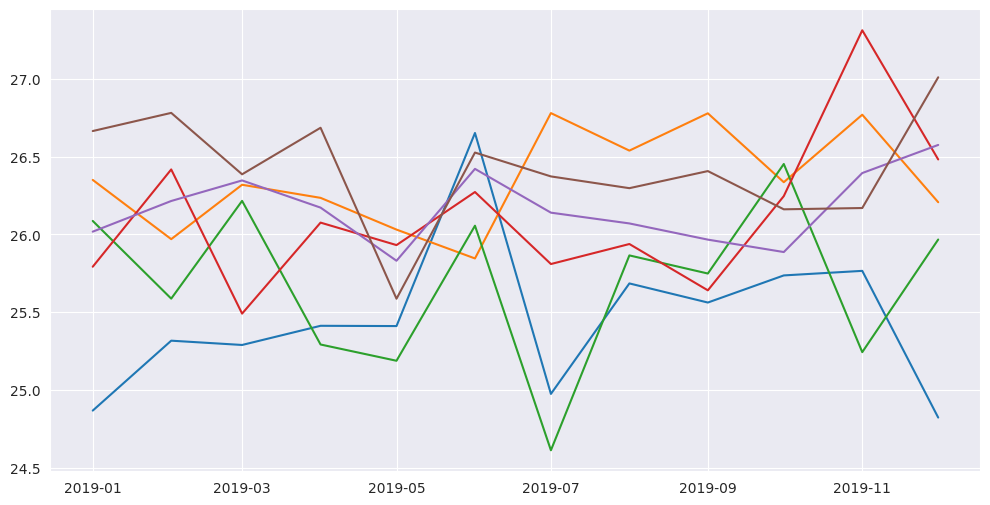

In [16]:
# Plotando o gráfico
plt.figure(figsize=(12, 6))
for regiao in idade_media.columns:
    plt.plot(idade_media.index.to_timestamp(), idade_media[regiao], label=regiao)

/tmp/ipykernel_9048/343834639.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Região Imediata')


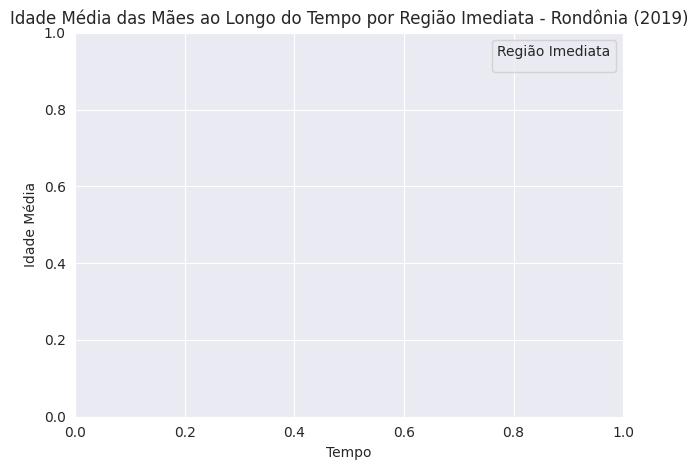

In [17]:
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata - Rondônia (2019)')
plt.xlabel('Tempo')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio',
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio',
    'Rolim de Moura': 'IDH-alto',
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto',
    'Cujubim': 'IDH-médio',
    'Alto Paraíso': 'IDH-médio',
    'Monte Negro': 'IDH-médio',
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio',
    'Porto Velho': 'IDH-alto',
    'Cacaulândia': 'IDH-médio',
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto',
    'Buritis': 'IDH-médio',
    'Vilhena':'IDH-alto',
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio',
    'Costa Marques':'IDH-médio',
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo',
    'Colorado do Oeste': 'IDH-médio',
    'Nova Mamoré': 'IDH-baixo',
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio',
    'Corumbiara':'IDH-médio',
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo',
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto',
    'Mirante da Serra':'IDH-médio',
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio',
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio',
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio',
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio',
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio',
    'Chupinguaia':'IDH-médio',
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo',
    'Teixeirópolis':'IDH-médio',
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'
}

In [21]:
idh = sinasc_raw.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
IDH-alto    26.280332   26.0  6.415374  31.074091   30.0  7.773149
IDH-baixo   25.326944   25.0  6.194908  30.617450   30.0  7.417345
IDH-médio   25.884855   25.0  6.353274  31.207092   30.0  7.824859

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',

}

In [24]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


In [25]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,179957.0,31.145206,15.0,70.0,30.0,7.741017,59.923346
des_regular,25327.0,31.345297,16.0,73.0,30.0,7.975385,63.606768


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [18]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}
PIB

{'Porto Velho': 'Acima de 1 bilhão',
 'Ji-Paraná': 'Acima de 1 bilhão',
 'Vilhena': 'Acima de 1 bilhão',
 'Ariquemes': 'Acima de 1 bilhão',
 'Cacoal': 'Acima de 1 bilhão',
 'Jaru': 'Acima de 1 bilhão',
 'Rolim de Moura': 'Acima de 1 bilhão',
 'Pimenta Bueno': 'Acima de 1 bilhão',
 'Guajará-Mirim': 'Acima de 500 Milhões',
 'Ouro Preto do Oeste': 'Acima de 500 Milhões',
 'Buritis': 'Acima de 500 Milhões',
 'Machadinho do Oeste': 'Acima de 500 Milhões',
 "Espigão d'Oeste": 'Acima de 500 Milhões',
 'São Miguel do Guaporé': 'Acima de 500 Milhões',
 'Candeias do Jamari': 'Acima de 500 Milhões',
 'Nova Mamoré': 'Acima de 500 Milhões',
 'Cerejeiras': 'Acima de 500 Milhões',
 'Alta Floresta do Oeste': 'Acima de 300 Milhões',
 'Presidente Médici': 'Acima de 300 Milhões',
 'Cujubim': 'Acima de 300 Milhões',
 'Nova Brasilândia do Oeste': 'Acima de 300 Milhões',
 'Alto Paraíso': 'Acima de 300 Milhões',
 'São Francisco do Guaporé': 'Acima de 300 Milhões',
 'Colorado do Oeste': 'Acima de 300 Milhões'

In [45]:
pip install lxml

  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/0a/6e/94537acfb5b8f18235d13186d247bca478fea5e87d224644e0fe907df976/lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the target URL
url_pib = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'

# Fetch the webpage content using requests
response = requests.get(url_pib)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Locate all tables on the webpage
    tables = soup.find_all('table')

    # Read the first table using pandas
    if tables:
        # Convert the HTML table to a DataFrame
        df = pd.read_html(str(tables[0]))[0]
        print(df.head())  # Display the first few rows of the extracted data
    else:
        print("No tables found on the webpage.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


  Posição                   Município         PIB Alteração
  Em 2019 Mudança (2014)    Município         PIB Alteração
0       1            (0)  Porto Velho  17 912 070       NaN
1       2            (0)    Ji-Paraná   3 783 972       NaN
2       3            (0)      Vilhena   2 831 175       NaN
3       4            (0)    Ariquemes   2 579 830       NaN
4       5            (0)       Cacoal   2 261 644       NaN


/tmp/ipykernel_9048/2928156314.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[0]))[0]


In [ ]:
# Import necessary libraries
from bs4 import BeautifulSoup
import pandas as pd
# URL to fetch HTML content from
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'
# Example HTML content for demonstration (replace with your actual HTML)
html_content = """
<html>
    <body>
        <table>
            <thead>
                <tr>
                    <th>Year</th>
                    <th>GDP</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>2021</td>
                    <td>21.4</td>
                </tr>
                <tr>
                    <td>2022</td>
                    <td>22.8</td>
                </tr>
            </tbody>
        </table>
    </body>
</html>
"""
# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find all table elements
tables_html = soup.find_all('table')

# Parse the tables manually into DataFrames
tables_pib = []
for table in tables_html:
    headers = [header.text for header in table.find_all('th')]  # Extract table headers
    rows = [
        [cell.text for cell in row.find_all('td')]  # Extract each row's data
        for row in table.find_all('tr')[1:]  # Skip header row
    ]
    # Create a DataFrame for the current table
    df = pd.DataFrame(rows, columns=headers)
    tables_pib.append(df)

# Example process: Display the first table if it exists
if tables_pib:  # Check if any tables were found
    pib_data = tables_pib[0]  # Select the first table
    print(pib_data)
else:
    print("No tables found.")